In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a simple dataset with 10 features
X, y = make_classification(n_samples=100, n_features=10, random_state=42)

In [6]:
# Scale the dataset to make it non-negative
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [7]:

# Convert it into a DataFrame for better visualization
df = pd.DataFrame(X_scaled, columns=[f'Feature_{i}' for i in range(1, 11)])
df['Target'] = y


In [8]:

# Display the first few rows of the dataset
print(df.head())


   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   0.298257   0.790521   0.665984   0.743001   0.664317   0.214715   
1   0.503544   0.243093   0.620667   0.146077   0.349280   0.539297   
2   0.674875   0.662367   0.251148   0.755704   0.113549   0.370377   
3   0.632541   0.437349   0.388420   0.451547   0.397091   0.601151   
4   0.835132   0.179724   0.236704   0.219801   0.199158   0.840419   

   Feature_7  Feature_8  Feature_9  Feature_10  Target  
0   0.818812   0.855751   0.310252    0.000000       1  
1   0.559332   0.670568   0.516725    0.758937       1  
2   0.466442   0.202432   0.255330    0.503009       0  
3   0.506826   0.302252   0.382752    0.499839       0  
4   0.483507   0.068906   0.443221    0.756817       0  


In [9]:

# Split the dataset into features (X) and target (y)
X = df.drop(columns=['Target'])
y = df['Target']


In [10]:

# Method 1: Univariate Feature Selection (SelectKBest)
k_best = SelectKBest(score_func=chi2, k=3)  # Select the top 3 features
X_kbest = k_best.fit_transform(X, y)
# Method 2: Recursive Feature Elimination (RFE)
rf_classifier = RandomForestClassifier()
rfe = RFE(estimator=rf_classifier, n_features_to_select=3)  # Select the top 3 features
X_rfe = rfe.fit_transform(X, y)

# Method 3: Feature Importance from Tree-based model (Random Forest)
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)
feature_importances = rf_classifier.feature_importances_
# Select the top 3 features based on importance scores
top_feature_indices = np.argsort(feature_importances)[-3:]
X_rf_importance = X.iloc[:, top_feature_indices]


In [11]:


# Display which features were selected by each method
print("Features selected by SelectKBest:", X.columns[k_best.get_support()])
print("Features selected by RFE:", X.columns[rfe.support_])
print("Features selected by Feature Importance:", X.columns[top_feature_indices])


Features selected by SelectKBest: Index(['Feature_1', 'Feature_3', 'Feature_4'], dtype='object')
Features selected by RFE: Index(['Feature_1', 'Feature_3', 'Feature_4'], dtype='object')
Features selected by Feature Importance: Index(['Feature_4', 'Feature_1', 'Feature_3'], dtype='object')


In [12]:

# Split the data into training and testing sets
X_train_kbest, X_test_kbest, y_train, y_test = train_test_split(X_kbest, y, test_size=0.2, random_state=42)
X_train_rfe, X_test_rfe, _, _ = train_test_split(X_rfe, y, test_size=0.2, random_state=42)
X_train_rf_importance, X_test_rf_importance, _, _ = train_test_split(X_rf_importance, y, test_size=0.2, random_state=42)


In [13]:

# Build a simple Logistic Regression model using the selected features
model_kbest = LogisticRegression()
model_kbest.fit(X_train_kbest, y_train)

model_rfe = LogisticRegression()
model_rfe.fit(X_train_rfe, y_train)

model_rf_importance = LogisticRegression()
model_rf_importance.fit(X_train_rf_importance, y_train)

# Evaluate the models on the test set
y_pred_kbest = model_kbest.predict(X_test_kbest)
accuracy_kbest = accuracy_score(y_test, y_pred_kbest)

y_pred_rfe = model_rfe.predict(X_test_rfe)
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)

y_pred_rf_importance = model_rf_importance.predict(X_test_rf_importance)
accuracy_rf_importance = accuracy_score(y_test, y_pred_rf_importance)


In [14]:

# Display the accuracy of each model
print("Accuracy using SelectKBest:", accuracy_kbest)
print("Accuracy using RFE:", accuracy_rfe)
print("Accuracy using Feature Importance:", accuracy_rf_importance)

Accuracy using SelectKBest: 1.0
Accuracy using RFE: 1.0
Accuracy using Feature Importance: 1.0


   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   0.298257   0.790521   0.665984   0.743001   0.664317   0.214715   
1   0.503544   0.243093   0.620667   0.146077   0.349280   0.539297   
2   0.674875   0.662367   0.251148   0.755704   0.113549   0.370377   
3   0.632541   0.437349   0.388420   0.451547   0.397091   0.601151   
4   0.835132   0.179724   0.236704   0.219801   0.199158   0.840419   

   Feature_7  Feature_8  Feature_9  Feature_10  Target  
0   0.818812   0.855751   0.310252    0.000000       0  
1   0.559332   0.670568   0.516725    0.758937       1  
2   0.466442   0.202432   0.255330    0.503009       0  
3   0.506826   0.302252   0.382752    0.499839       0  
4   0.483507   0.068906   0.443221    0.756817       0  
Features selected by SelectKBest: Index(['Feature_1', 'Feature_3', 'Feature_4'], dtype='object')
Features selected by RFE: Index(['Feature_1', 'Feature_3', 'Feature_4'], dtype='object')
Features selected by Feature Importance: Inde

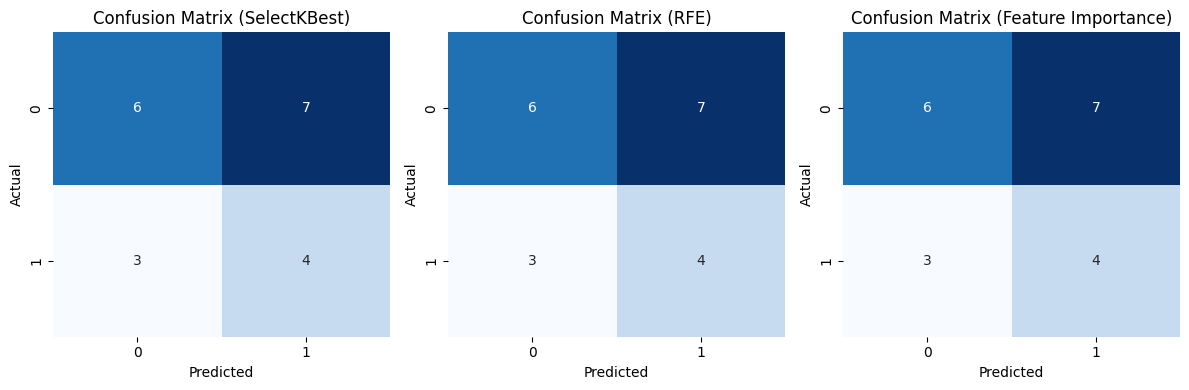


Classification Report (SelectKBest):
               precision    recall  f1-score   support

           0       0.67      0.46      0.55        13
           1       0.36      0.57      0.44         7

    accuracy                           0.50        20
   macro avg       0.52      0.52      0.49        20
weighted avg       0.56      0.50      0.51        20


Classification Report (RFE):
               precision    recall  f1-score   support

           0       0.67      0.46      0.55        13
           1       0.36      0.57      0.44         7

    accuracy                           0.50        20
   macro avg       0.52      0.52      0.49        20
weighted avg       0.56      0.50      0.51        20


Classification Report (Feature Importance):
               precision    recall  f1-score   support

           0       0.67      0.46      0.55        13
           1       0.36      0.57      0.44         7

    accuracy                           0.50        20
   macro avg

In [16]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Create a simple dataset with 10 features
X, y = make_classification(n_samples=100, n_features=10, random_state=42)

# Introduce noise to labels (flipping 10% of labels)
np.random.seed(42)
random_indices = np.random.choice(len(y), size=int(0.1 * len(y)), replace=False)
y[random_indices] = 1 - y[random_indices]

# Scale the dataset to make it non-negative
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert it into a DataFrame for better visualization
df = pd.DataFrame(X_scaled, columns=[f'Feature_{i}' for i in range(1, 11)])
df['Target'] = y

# Display the first few rows of the dataset
print(df.head())

# Split the dataset into features (X) and target (y)
X = df.drop(columns=['Target'])
y = df['Target']

# Method 1: Univariate Feature Selection (SelectKBest)
k_best = SelectKBest(score_func=chi2, k=3)  # Select the top 3 features
X_kbest = k_best.fit_transform(X, y)

# Method 2: Recursive Feature Elimination (RFE)
rf_classifier = RandomForestClassifier()
rfe = RFE(estimator=rf_classifier, n_features_to_select=3)  # Select the top 3 features
X_rfe = rfe.fit_transform(X, y)

# Method 3: Feature Importance from Tree-based model (Random Forest)
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)
feature_importances = rf_classifier.feature_importances_
# Select the top 3 features based on importance scores
top_feature_indices = np.argsort(feature_importances)[-3:]
X_rf_importance = X.iloc[:, top_feature_indices]

# Display which features were selected by each method
print("Features selected by SelectKBest:", X.columns[k_best.get_support()])
print("Features selected by RFE:", X.columns[rfe.support_])
print("Features selected by Feature Importance:", X.columns[top_feature_indices])

# Split the data into training and testing sets
X_train_kbest, X_test_kbest, y_train, y_test = train_test_split(X_kbest, y, test_size=0.2, random_state=42)
X_train_rfe, X_test_rfe, _, _ = train_test_split(X_rfe, y, test_size=0.2, random_state=42)
X_train_rf_importance, X_test_rf_importance, _, _ = train_test_split(X_rf_importance, y, test_size=0.2, random_state=42)

# Build a simple Logistic Regression model using the selected features
model_kbest = LogisticRegression()
model_kbest.fit(X_train_kbest, y_train)

model_rfe = LogisticRegression()
model_rfe.fit(X_train_rfe, y_train)

model_rf_importance = LogisticRegression()
model_rf_importance.fit(X_train_rf_importance, y_train)

# Evaluate the models on the test set
y_pred_kbest = model_kbest.predict(X_test_kbest)
accuracy_kbest = accuracy_score(y_test, y_pred_kbest)

y_pred_rfe = model_rfe.predict(X_test_rfe)
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)

y_pred_rf_importance = model_rf_importance.predict(X_test_rf_importance)
accuracy_rf_importance = accuracy_score(y_test, y_pred_rf_importance)

# Display the accuracy of each model
print("Accuracy using SelectKBest:", accuracy_kbest)
print("Accuracy using RFE:", accuracy_rfe)
print("Accuracy using Feature Importance:", accuracy_rf_importance)

# Create confusion matrices for each model
cm_kbest = confusion_matrix(y_test, y_pred_kbest)
cm_rfe = confusion_matrix(y_test, y_pred_rfe)
cm_rf_importance = confusion_matrix(y_test, y_pred_rf_importance)

# Plot confusion matrices
plt.figure(figsize=(12, 4))

plt.subplot(131)
sns.heatmap(cm_kbest, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (SelectKBest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(132)
sns.heatmap(cm_rfe, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (RFE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(133)
sns.heatmap(cm_rf_importance, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Feature Importance)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# Compare classification reports
print("\nClassification Report (SelectKBest):\n", classification_report(y_test, y_pred_kbest))
print("\nClassification Report (RFE):\n", classification_report(y_test, y_pred_rfe))
print("\nClassification Report (Feature Importance):\n", classification_report(y_test, y_pred_rf_importance))


   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   0.298257   0.790521   0.665984   0.743001   0.664317   0.214715   
1   0.503544   0.243093   0.620667   0.146077   0.349280   0.539297   
2   0.674875   0.662367   0.251148   0.755704   0.113549   0.370377   
3   0.632541   0.437349   0.388420   0.451547   0.397091   0.601151   
4   0.835132   0.179724   0.236704   0.219801   0.199158   0.840419   

   Feature_7  Feature_8  Feature_9  Feature_10  Target  
0   0.818812   0.855751   0.310252    0.000000       0  
1   0.559332   0.670568   0.516725    0.758937       1  
2   0.466442   0.202432   0.255330    0.503009       0  
3   0.506826   0.302252   0.382752    0.499839       0  
4   0.483507   0.068906   0.443221    0.756817       0  


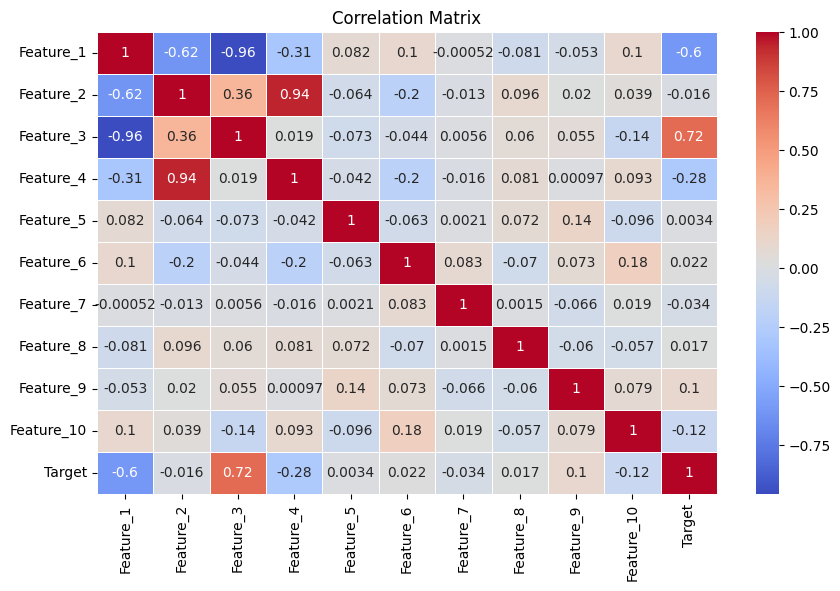

Features selected by SelectKBest: Index(['Feature_1', 'Feature_3', 'Feature_4'], dtype='object')
Features selected by RFE: Index(['Feature_1', 'Feature_3', 'Feature_4'], dtype='object')
Features selected by Feature Importance: Index(['Feature_4', 'Feature_1', 'Feature_3'], dtype='object')
Accuracy using SelectKBest: 0.5
Accuracy using RFE: 0.5
Accuracy using Feature Importance: 0.5


Text(0.5, 1.0, 'Confusion Matrix (Feature Importance)')

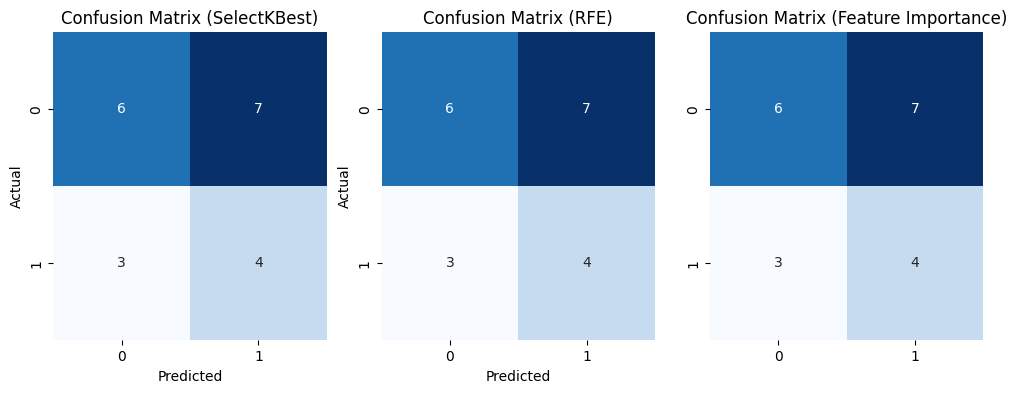

In [17]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Create a simple dataset with 10 features and add some noise
X, y = make_classification(n_samples=100, n_features=10, random_state=42)

# Introduce noise to labels (flipping 10% of labels)
np.random.seed(42)
random_indices = np.random.choice(len(y), size=int(0.1 * len(y)), replace=False)
y[random_indices] = 1 - y[random_indices]

# Scale the dataset to make it non-negative
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert it into a DataFrame for better visualization
df = pd.DataFrame(X_scaled, columns=[f'Feature_{i}' for i in range(1, 11)])
df['Target'] = y

# Display the first few rows of the dataset
print(df.head())

# Calculate and visualize the correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Split the dataset into features (X) and target (y)
X = df.drop(columns=['Target'])
y = df['Target']

# Method 1: Univariate Feature Selection (SelectKBest)
k_best = SelectKBest(score_func=chi2, k=3)  # Select the top 3 features
X_kbest = k_best.fit_transform(X, y)

# Method 2: Recursive Feature Elimination (RFE)
rf_classifier = RandomForestClassifier()
rfe = RFE(estimator=rf_classifier, n_features_to_select=3)  # Select the top 3 features
X_rfe = rfe.fit_transform(X, y)

# Method 3: Feature Importance from Tree-based model (Random Forest)
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)
feature_importances = rf_classifier.feature_importances_
# Select the top 3 features based on importance scores
top_feature_indices = np.argsort(feature_importances)[-3:]
X_rf_importance = X.iloc[:, top_feature_indices]

# Display which features were selected by each method
print("Features selected by SelectKBest:", X.columns[k_best.get_support()])
print("Features selected by RFE:", X.columns[rfe.support_])
print("Features selected by Feature Importance:", X.columns[top_feature_indices])

# Split the data into training and testing sets
X_train_kbest, X_test_kbest, y_train, y_test = train_test_split(X_kbest, y, test_size=0.2, random_state=42)
X_train_rfe, X_test_rfe, _, _ = train_test_split(X_rfe, y, test_size=0.2, random_state=42)
X_train_rf_importance, X_test_rf_importance, _, _ = train_test_split(X_rf_importance, y, test_size=0.2, random_state=42)

# Build a simple Logistic Regression model using the selected features
model_kbest = LogisticRegression()
model_kbest.fit(X_train_kbest, y_train)

model_rfe = LogisticRegression()
model_rfe.fit(X_train_rfe, y_train)

model_rf_importance = LogisticRegression()
model_rf_importance.fit(X_train_rf_importance, y_train)

# Evaluate the models on the test set
y_pred_kbest = model_kbest.predict(X_test_kbest)
accuracy_kbest = accuracy_score(y_test, y_pred_kbest)

y_pred_rfe = model_rfe.predict(X_test_rfe)
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)

y_pred_rf_importance = model_rf_importance.predict(X_test_rf_importance)
accuracy_rf_importance = accuracy_score(y_test, y_pred_rf_importance)

# Display the accuracy of each model
print("Accuracy using SelectKBest:", accuracy_kbest)
print("Accuracy using RFE:", accuracy_rfe)
print("Accuracy using Feature Importance:", accuracy_rf_importance)

# Create confusion matrices for each model
cm_kbest = confusion_matrix(y_test, y_pred_kbest)
cm_rfe = confusion_matrix(y_test, y_pred_rfe)
cm_rf_importance = confusion_matrix(y_test, y_pred_rf_importance)

# Plot confusion matrices
plt.figure(figsize=(12, 4))

plt.subplot(131)
sns.heatmap(cm_kbest, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (SelectKBest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(132)
sns.heatmap(cm_rfe, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (RFE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(133)
sns.heatmap(cm_rf_importance, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Feature Importance)")
